In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [276]:
df_benign = pd.read_csv('Data/CSV_benign.csv')
df_malware = pd.read_csv('Data/CSV_malware.csv')

/var/folders/l2/k0kzp4_94t124f1tz8_9bd9r0000gn/T/ipykernel_5010/956180555.py:1: DtypeWarning: Columns (9,10,12,13,17,18,20,21,24,25,27,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benign = pd.read_csv('Data/CSV_benign.csv')


In [277]:
# Label data
df_benign['label'] = 0
df_malware['label'] = 1

In [278]:
#Check if the two dataset have the same columns
sorted(list(df_malware.columns)) == sorted(list(df_benign.columns))

True

In [279]:
#Concatenate datasets
df = pd.concat([df_benign, df_malware])
df_concat = df

In [280]:
df_concat

Country       ASN    TTL               IP  \
0         US   15169.0     46    172.217.1.174   
1        NaN       NaN    299              NaN   
2        NaN       NaN     38              NaN   
3         US   15169.0    299  172.217.164.228   
4        NaN       NaN     96              NaN   
...      ...       ...    ...              ...   
4994      DE   24940.0  14399   148.251.70.130   
4995      NL  204915.0   3599    145.14.145.85   
4996     NaN       NaN   3599              NaN   
4997      DE    8767.0   1799    62.245.182.18   
4998      DE    8767.0   1799    62.245.182.48   

                                        Domain    State Registrant_Name  \
0                               b'google.com.'       CA             NaN   
1                               b'google.com.'       CA             NaN   
2                           b'www.google.com.'      NaN             NaN   
3                           b'www.google.com.'      NaN             NaN   
4                             b'facebook.com.'       CA             NaN   
...                                        ...      ...             ...   
4994                  b'naveenmechanical.com.'      NaN             NaN   
4995  b'onlinefrepdfviewer.000webhostapp.com.'  Larnaka             NaN   
4996  b'onlinefrepdfviewer.000webhostapp.com.'  Larnaka             NaN   
4997                  b'stefanie-bolemant.de.'      NaN             NaN   
4998                        b'web.asamnet.de.'      NaN             NaN   

     Country.1   Creation_Date_Time hex_32  ...  \
0           US  1997-09-15 04:00:00      0  ...   
1           US  1997-09-15 04:00:00      0  ...   
2          NaN  1997-09-15 04:00:00      0  ...   
3          NaN                  NaN      0  ...   
4           US  1997-03-29 05:00:00      0  ...   
...        ...                  ...    ...  ...   
4994       NaN                  NaN      0  ...   
4995        CY  2016-05-11 13:34:12      0  ...   
4996        CY  2016-05-11 13:34:12      0  ...   
4997       NaN                  NaN      0  ...   
4998       NaN                  NaN      0  ...   

                                                 typos oc_8  \
0         [('google.com', 100), ('google.com.br', 95)]    0   
1         [('google.com', 100), ('google.com.br', 95)]    0   
2         [('google.com', 100), ('google.com.br', 95)]    0   
3         [('google.com', 100), ('google.com.br', 95)]    0   
4              [('facebook.com', 100), ('qq.com', 86)]    0   
...                                                ...  ...   
4994       [('facebook.com', 86), ('twitter.com', 86)]    0   
4995         [('twitter.com', 86), ('google.com', 86)]    0   
4996         [('twitter.com', 86), ('google.com', 86)]    0   
4997         [('google.de', 86), ('e-recht24.de', 86)]    0   
4998  [('gesetze-im-internet.de', 86), ('web.de', 86)]    0   

                                                  3gram  \
0                          ['goo', 'oog', 'ogl', 'gle']   
1                          ['goo', 'oog', 'ogl', 'gle']   
2                          ['goo', 'oog', 'ogl', 'gle']   
3                          ['goo', 'oog', 'ogl', 'gle']   
4            ['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']   
...                                                 ...   
4994  ['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'me...   
4995  ['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...   
4996  ['000', '00w', '0we', 'web', 'ebh', 'bho', 'ho...   
4997  ['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie...   
4998                ['asa', 'sam', 'amn', 'mne', 'net']   

                                      char_distribution  \
0     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
1     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...   
3     defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...   
4     defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o...   
...                                                 ...   
4994  defau

<Axes: >

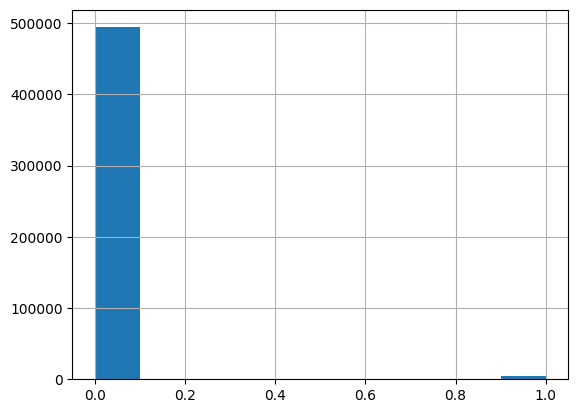

In [281]:
#Visualize class imbalance
df_concat['label'].hist()

## EDA

In [282]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499134 entries, 0 to 4998
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             389247 non-null  object 
 1   ASN                 389304 non-null  float64
 2   TTL                 499134 non-null  object 
 3   IP                  390538 non-null  object 
 4   Domain              499134 non-null  object 
 5   State               220137 non-null  object 
 6   Registrant_Name     13710 non-null   object 
 7   Country.1           256983 non-null  object 
 8   Creation_Date_Time  366046 non-null  object 
 9   hex_32              499011 non-null  object 
 10  hex_8               499134 non-null  object 
 11  Domain_Name         401406 non-null  object 
 12  Alexa_Rank          444716 non-null  object 
 13  subdomain           499118 non-null  object 
 14  Organization        204027 non-null  object 
 15  len                 498776 non-null  obje

In [283]:
# Data summarization function
def data_summary(data, ascending=False):
    
    data = df_concat[categorical_columns]
    summary = pd.DataFrame(data.isna().sum(), columns=['nan_count'])

    unique_val = []
    types_val = []
    zero_val = []

    for column in data.columns:
        unique = len(data[column].unique())
        types = str(data[column].dtype)
        zeros = len(data[data[column]==0])

        unique_val.append(unique)
        types_val.append(types)
        zero_val.append(zeros)

    summary['nan_percentage'] = round((data.isnull().sum() / len(data)) * 100, 1)
    summary['Unique_val count'] = unique_val
    summary['unique_percentage'] = round((data.nunique() / len(data)) * 100, 1)
    summary['Zero values count'] = zero_val
    summary['Data type'] = types_val

    summary.sort_values(by=['nan_count', 'Zero values count'], ascending=ascending)
    
    return summary

In [284]:
# Create summary of Nan and unique values counts and data types
data_summary(df_concat)

nan_count  nan_percentage  Unique_val count  \
Country               109887            22.0               285   
IP                    108596            21.8            177855   
Domain                     0             0.0            313538   
State                 278997            55.9              5814   
Country.1             242151            48.5              1620   
Domain_Name            97728            19.6            195952   
Organization          295107            59.1             39735   
longest_word             133             0.0             34204   
1gram                     22             0.0            211753   
Domain_Age             54414            10.9            333589   
tld                        3             0.0             31786   
Emails                172234            34.5             44745   
typos                      0             0.0             30268   
3gram                      0             0.0            210746   
char_distribution          0             0.0            284881   
2gram                    187             0.0            229924   
Registrar             141239            28.3             17290   
sld                     1329             0.3            177014   

                   unique_percentage  Zero values count Data type  
Country                          0.1                  0    object  
IP                              35.6                  0    object  
Domain                          62.8                  0    object  
State                            1.2                  0    object  
Country.1                        0.3                  0    object  
Domain_Name                     39.3                  0    object  
Organization                     8.0                  0    object  
longest_word                     6.9                  0    object  
1gram                           42.4                  0    object  
Domain_Age                      66.8                  0    object  
tld                              6.4                  0    object  
Emails                           9.0                  0    object  
typos                            6.1                  0    object  
3gram                           42.2                  0    object  
char_distribution               57.1                  0    object  
2gram                           46.1                  0    object  
Registrar                        3.5                  0    object  
sld                             35.5                  0    object

In [285]:
# Calculate the percentage of NaN values in each column
nan_percentage = (df_concat.isnull().sum() / len(df_concat)) * 100

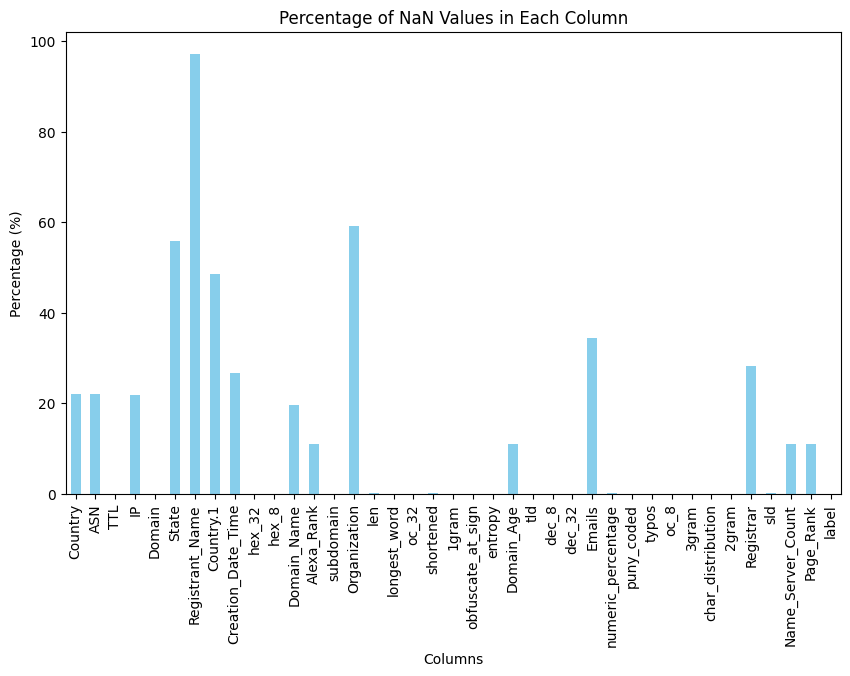

In [286]:
# Create a bar plot
plt.figure(figsize=(10, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

## Data Cleaning

In [287]:
# Drop columns with high number of nan values
# Set the threshold for missing data (75%)
threshold = 0.25 * len(df_concat)

# Drop columns with missing data exceeding the threshold
df_concat = df_concat.dropna(thresh=threshold, axis=1)

In [288]:
pd.options.mode.chained_assignment = None  # default='warn'

In [289]:
# Convert 'Creation_Date_Time' to a proper date format. The errors parameter can be set to 'coerce,' 
# which forces any parsing errors to be set as NaT (Not a Timestamp).
df_concat['Creation_Date_Time'] = pd.to_datetime(df_concat['Creation_Date_Time'], errors='coerce')

In [290]:
#Split 'Creation_Date_Time' into seperate year and month columns
# Create 'Year' and 'Month' columns
df_concat['Year'] = df_concat['Creation_Date_Time'].dt.year
df_concat['Month'] = df_concat['Creation_Date_Time'].dt.month

In [291]:
# Drop datetime column
df_concat = df_concat.drop(columns=['Creation_Date_Time'])

In [292]:
df_concat.head(3).T

0  \
Country                                                            US   
ASN                                                           15169.0   
TTL                                                                46   
IP                                                      172.217.1.174   
Domain                                                 b'google.com.'   
State                                                              CA   
Country.1                                                          US   
hex_32                                                              0   
hex_8                                                               0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                           0   
Organization                                               Google LLC   
len                                                                 7   
longest_word                                                   google   
oc_32                                                             0.0   
shortened                                                        -1.0   
1gram                                  ['g', 'o', 'o', 'g', 'l', 'e']   
obfuscate_at_sign                                                 0.0   
entropy                                            1.8348756474779464   
Domain_Age                                  8256 days 11:53:49.631067   
tld                                                               com   
dec_8                                                               0   
dec_32                                                              0   
Emails              ['abusecomplaints@markmonitor.com', 'whoisrequ...   
numeric_percentage                                                0.0   
puny_coded                                                          0   
typos                    [('google.com', 100), ('google.com.br', 95)]   
oc_8                                                                0   
3gram                                    ['goo', 'oog', 'ogl', 'gle']   
char_distribution   defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                  ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                            MarkMonitor inc.   
sld                                                            google   
Name_Server_Count                                                 8.0   
Page_Rank                                                        -1.0   
label                                                               0   
Year                                                           1997.0   
Month                                                             9.0   

                                                                    1  \
Country                                                           NaN   
ASN                                                               NaN   
TTL                                                               299   
IP                                                                NaN   
Domain                                                 b'google.com.'   
State                                                              CA   
Country.1                                                          US   
hex_32                                                              0   
hex_8                                                               0   
Domain_Name                              ['GOOGLE.COM', 'google.com']   
Alexa_Rank                                                        1.0   
subdomain                                                           0   
Organization                                               Google LLC   
len                                                                 7   
longest_word                                        

In [263]:
# Determine which columns can be converted to numeric data type
numerical_columns = ['TTL','hex_32','hex_8', 'Alexa_Rank', 'subdomain', 'len', 'oc_32', 'shortened', 'entropy', 'obfuscate_at_sign', 'ASN', 
                     'dec_8', 'dec_32', 'numeric_percentage', 'puny_coded', 'oc_8', 'Name_Server_Count', 'Page_Rank', 'Year', 'Month', 'label']

In [264]:
# Convert to numeric data type
df_concat[numerical_columns] = df_concat[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [265]:
# Determine which columns are categorical data type by dropping numeric columns
categorical_columns = df_concat.drop(columns=numerical_columns).columns

In [266]:
df_concat[numerical_columns]

TTL  hex_32  hex_8  Alexa_Rank  subdomain   len  oc_32  shortened  \
0        46.0     0.0    0.0         1.0        0.0   7.0    0.0       -1.0   
1       299.0     0.0    0.0         1.0        0.0   7.0    0.0       -1.0   
2        38.0     0.0    0.0         1.0        1.0  10.0    0.0       -1.0   
3       299.0     0.0    0.0         NaN        1.0  10.0    0.0       -1.0   
4        96.0     0.0    0.0         4.0        0.0   9.0    0.0       -1.0   
...       ...     ...    ...         ...        ...   ...    ...        ...   
4994  14399.0     0.0    0.0         NaN        0.0  17.0    0.0       -1.0   
4995   3599.0     0.0    0.0      3851.0        1.0  32.0    0.0       -1.0   
4996   3599.0     0.0    0.0      3851.0        1.0  32.0    0.0       -1.0   
4997   1799.0     0.0    0.0        -1.0        0.0  18.0    0.0       -1.0   
4998   1799.0     0.0    0.0   5004230.0        1.0  11.0    0.0       -1.0   

       entropy  obfuscate_at_sign  ...  dec_8  dec_32  numeric_percentage  \
0     1.834876                0.0  ...    0.0     0.0            0.000000   
1     1.834876                0.0  ...    0.0     0.0            0.000000   
2     2.114247                0.0  ...    0.0     0.0            0.000000   
3     2.114247                0.0  ...    0.0     0.0            0.000000   
4     2.595489                0.0  ...    0.0     0.0            0.000000   
...        ...                ...  ...    ...     ...                 ...   
4994  2.890279                0.0  ...    0.0     0.0            0.000000   
4995  3.808768                0.0  ...    0.0     0.0            7.894737   
4996  3.808768                0.0  ...    0.0     0.0            7.894737   
4997  3.340769                0.0  ...    0.0     0.0            0.000000   
4998  2.781301                0.0  ...    0.0     0.0            0.000000   

      puny_coded  oc_8  Name_Server_Count  Page_Rank    Year  Month  label  
0            0.0   0.0                8.0       -1.0  1997.0    9.0      0  
1            0.0   0.0                8.0       -1.0  1997.0    9.0      0  
2            0.0   0.0                4.0       -1.0  1997.0    9.0      0  
3            0.0   0.0                NaN        NaN     NaN    NaN      0  
4            0.0   0.0                4.0       -1.0  1997.0    3.0      0  
...          ...   ...                ...        ...     ...    ...    ...  
4994         0.0   0.0                NaN        NaN     NaN    NaN      1  
4995         0.0   0.0                4.0       -1.0  2016.0    5.0      1  
4996         0.0   0.0                4.0       -1.0  2016.0    5.0      1  
4997         0.0   0.0                0.0       -1.0     NaN    NaN      1  
4998         0.0   0.0                0.0       -1.0     NaN    NaN      1  

[499134 rows x 21 columns]

In [267]:
df_concat[categorical_columns].T

0     \
Country                                                           US   
IP                                                     172.217.1.174   
Domain                                                b'google.com.'   
State                                                             CA   
Country.1                                                         US   
Domain_Name                             ['GOOGLE.COM', 'google.com']   
Organization                                              Google LLC   
longest_word                                                  google   
1gram                                 ['g', 'o', 'o', 'g', 'l', 'e']   
Domain_Age                                 8256 days 11:53:49.631067   
tld                                                              com   
Emails             ['abusecomplaints@markmonitor.com', 'whoisrequ...   
typos                   [('google.com', 100), ('google.com.br', 95)]   
3gram                                   ['goo', 'oog', 'ogl', 'gle']   
char_distribution  defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                 ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                           MarkMonitor inc.   
sld                                                           google   

                                                                1     \
Country                                                          NaN   
IP                                                               NaN   
Domain                                                b'google.com.'   
State                                                             CA   
Country.1                                                         US   
Domain_Name                             ['GOOGLE.COM', 'google.com']   
Organization                                              Google LLC   
longest_word                                                  google   
1gram                                 ['g', 'o', 'o', 'g', 'l', 'e']   
Domain_Age                                 8256 days 11:53:50.479085   
tld                                                              com   
Emails             ['abusecomplaints@markmonitor.com', 'whoisrequ...   
typos                   [('google.com', 100), ('google.com.br', 95)]   
3gram                                   ['goo', 'oog', 'ogl', 'gle']   
char_distribution  defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g...   
2gram                                 ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                           MarkMonitor inc.   
sld                                                           google   

                                                                2     \
Country                                                          NaN   
IP                                                               NaN   
Domain                                            b'www.google.com.'   
State                                                            NaN   
Country.1                                                        NaN   
Domain_Name                                               GOOGLE.COM   
Organization                                                     NaN   
longest_word                                                  google   
1gram                                 ['g', 'o', 'o', 'g', 'l', 'e']   
Domain_Age                                 8256 days 11:53:51.264191   
tld                                                              com   
Emails                               abusecomplaints@markmonitor.com   
typos                   [('google.com', 100), ('google.com.br', 95)]   
3gram                                   ['goo', 'oog', 'ogl', 'gle']   
char_distribution  defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w...   
2gram                                 ['go', 'oo', 'og', 'gl', 'le']   
Registrar                                           MarkMonitor Inc.   
sld                           

In [268]:
# Create summary of Nan and unique values counts for categorical data
data_summary(df_concat[categorical_columns])

nan_count  nan_percentage  Unique_val count  \
Country               109887            22.0               285   
IP                    108596            21.8            177855   
Domain                     0             0.0            313538   
State                 278997            55.9              5814   
Country.1             242151            48.5              1620   
Domain_Name            97728            19.6            195952   
Organization          295107            59.1             39735   
longest_word             133             0.0             34204   
1gram                     22             0.0            211753   
Domain_Age             54414            10.9            333589   
tld                        3             0.0             31786   
Emails                172234            34.5             44745   
typos                      0             0.0             30268   
3gram                      0             0.0            210746   
char_distribution          0             0.0            284881   
2gram                    187             0.0            229924   
Registrar             141239            28.3             17290   
sld                     1329             0.3            177014   

                   unique_percentage  Zero values count Data type  
Country                          0.1                  0    object  
IP                              35.6                  0    object  
Domain                          62.8                  0    object  
State                            1.2                  0    object  
Country.1                        0.3                  0    object  
Domain_Name                     39.3                  0    object  
Organization                     8.0                  0    object  
longest_word                     6.9                  0    object  
1gram                           42.4                  0    object  
Domain_Age                      66.8                  0    object  
tld                              6.4                  0    object  
Emails                           9.0                  0    object  
typos                            6.1                  0    object  
3gram                           42.2                  0    object  
char_distribution               57.1                  0    object  
2gram                           46.1                  0    object  
Registrar                        3.5                  0    object  
sld                             35.5                  0    object

In [ ]:
from sklearn.preprocessing import TargetEncoder


enc_auto = TargetEncoder(smooth="auto")
X_trans = enc_auto.fit_transform(X, y)

In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['Animal Encoded'] = encoder.fit_transform(df['Animal'], df['Target'])

In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y['target']
)

# xgb_classifier.fit(X, y, sample_weight=classes_weights)

I would think that when you are trying to deploy a model, it's cleaner to have a pipeline of transformations on dataset using sklearn. You could even add all the transformations on your dataset, before training or inference, in a nice pipeline wrapper, such as a sklearn.pipeline.Pipeline object. If you use an sklearn implementation, it's easier to integrate and debug later.

In [274]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

# Sample DataFrame with a high cardinality column 'Category'
data = {'Category': ['Adsd', 'Bsds', 'Asds', 'Cds', 'Bsds', 'Bsdd']}
df = pd.DataFrame(data)

# Initialize the FeatureHasher with the desired hash space size
hasher = FeatureHasher(n_features=3, input_type='string')

# Transform the 'Category' column using the hashing trick
hashed_features = hasher.transform(df['Category']).toarray()
df_hashed = pd.DataFrame(hashed_features, columns=['Category_Hash_1', 'Category_Hash_2', 'Category_Hash_3'])


ValueError: Samples can not be a single string. The input must be an iterable over iterables of strings.

In [273]:
df

Category
0        A
1        B
2        A
3        C
4        B
5        B